In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt 
% matplotlib inline

In [2]:
multidatas = pd.read_csv('ex1data2.txt', names = ['sizeOfHouses', 'numberOfBedrooms', 'profit'])

In [3]:
multidatas.head()

,sizeOfHouses,numberOfBedrooms,profit
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [4]:
X = multidatas.iloc[:,:-1]
y = multidatas.iloc[:,-1]

In [5]:
X = (X - X.mean())/X.std()
X.head()

,sizeOfHouses,numberOfBedrooms
0,0.130010,-0.223675
1,-0.504190,-0.223675
2,0.502476,-0.223675
3,-0.735723,-1.537767
4,1.257476,1.090417


In [6]:
X.insert(0, 'ones', 1)

In [7]:
X.head()

,ones,sizeOfHouses,numberOfBedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [8]:
X = X.values
y = y.values

In [9]:
theta = np.zeros(X.shape[1])

In [10]:
theta

array([0., 0., 0.])

In [11]:
def hypothesis(X, theta):
    return  X @ theta

In [12]:
def cost(X, y, theta):
    m = X.shape[0]
    h = hypothesis(X, theta) - y
    return h.T @ h/(2 * m)

In [13]:
cost(X, y, theta)

65591548106.45744

In [14]:
def gradient(X, y, theta, alpha):
     m = X.shape[0]
     h = hypothesis(X, theta) - y
     inner = X.T @  h
     theta -= alpha/m * inner
     return theta

In [15]:
def batchgradient(iterations, theta):
    cost_list = []
    for i in range(iterations):
        theta = gradient(X, y, theta, alpha)
        cost_list.append(cost(X, y, theta))
    return cost_list, theta

In [16]:
alpha = 0.01
cost_list, theta = batchgradient(1500, theta)

In [17]:
theta

array([340412.56301439, 110540.56654627,  -6558.99054811])

Text(0.5,1,'Error vs. Training Epoch')

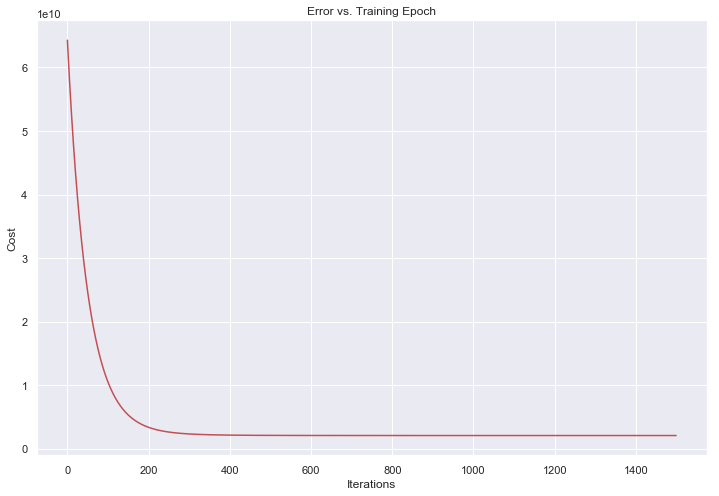

In [18]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(1500), cost_list, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

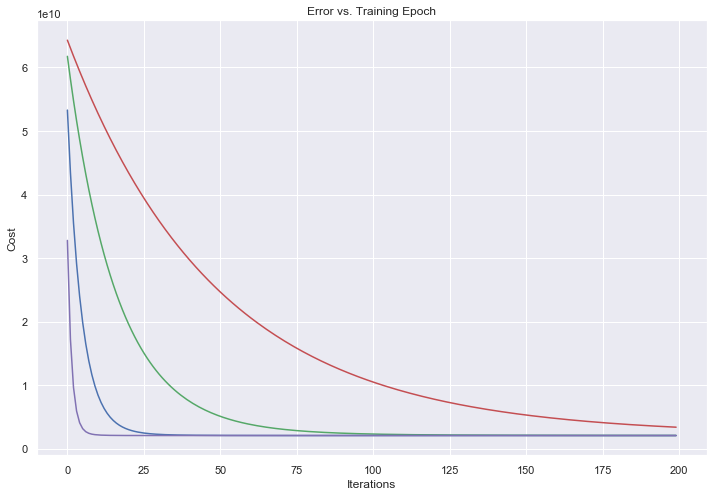

In [20]:
theta = np.zeros(X.shape[1])
#learningrate = [0.01, 0.03, 0.1, 0.3]
alpha_and_color = {'r': 0.01, 'g': 0.03, 'b': 0.1, 'm': 0.3}
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
for color,alpha in alpha_and_color.items():
    #alpha = i
    cost_list, theta = batchgradient(200, theta)
    ax.plot(np.arange(200), cost_list, color)
    theta =  np.zeros(X.shape[1])